<a href="https://colab.research.google.com/github/peekayitachi/Seedling_Classifier/blob/main/CV_FT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from google.colab import userdata

# Get Kaggle credentials from Colab Secrets Manager
kaggle_username = userdata.get('KAGGLE_USERNAME')
kaggle_key = userdata.get('KAGGLE_KEY')

# Create kaggle.json content using the retrieved credentials
kaggle_json_content = f'{{"username":"{kaggle_username}","key":"{kaggle_key}"}}'

# Write the content to kaggle.json file
with open('kaggle.json', 'w') as f:
    f.write(kaggle_json_content)

print("Kaggle credentials saved to kaggle.json from Secrets Manager.")

Kaggle credentials saved to kaggle.json from Secrets Manager.


## Kaggle integration



In [2]:
import os

# Create .kaggle directory
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Copy kaggle.json to .kaggle directory
!cp kaggle.json /root/.kaggle/

# Set permissions for kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d vbookshelf/v2-plant-seedlings-dataset

# Unzip the dataset
!unzip -q v2-plant-seedlings-dataset.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/vbookshelf/v2-plant-seedlings-dataset
License(s): CC-BY-SA-4.0
100% 3.19G/3.19G [00:24<00:00, 44.3MB/s]
100% 3.19G/3.19G [00:24<00:00, 142MB/s] 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

DATA_DIR = 'dataset/v2-plant-seedlings-dataset/train'

In [4]:
import os

# List contents of the 'dataset' directory to find the correct path
print(os.listdir('dataset'))

['Small-flowered Cranesbill', 'Black-grass', 'nonsegmentedv2', 'Fat Hen', 'Loose Silky-bent', 'Scentless Mayweed', 'Common wheat', 'Charlock', 'Common Chickweed', 'Cleavers', 'Sugar beet', 'ShepherdтАЩs Purse', 'Maize']


Class Names: ['Small-flowered Cranesbill', 'Black-grass', 'Fat Hen', 'Loose Silky-bent', 'Scentless Mayweed', 'Common wheat', 'Charlock', 'Common Chickweed', 'Cleavers', 'Sugar beet', 'ShepherdтАЩs Purse', 'Maize']

First 5 image paths:


path                      class
0  dataset/Small-flowered Cranesbill/128.png  Small-flowered Cranesbill
1  dataset/Small-flowered Cranesbill/265.png  Small-flowered Cranesbill
2   dataset/Small-flowered Cranesbill/39.png  Small-flowered Cranesbill
3  dataset/Small-flowered Cranesbill/277.png  Small-flowered Cranesbill
4   dataset/Small-flowered Cranesbill/36.png  Small-flowered Cranesbill


Class Distribution:


class
Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
ShepherdтАЩs Purse           274
Maize                        257
Common wheat                 253
Name: count, dtype: int64

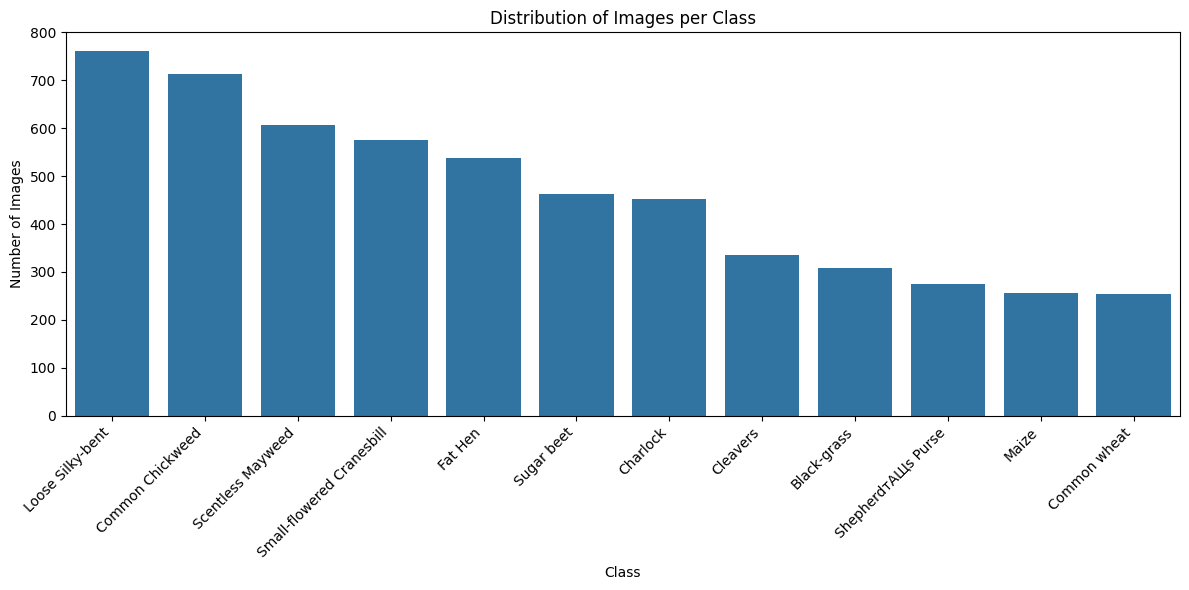


Sample Images:
Could not load image dataset/Maize/178.png: num must be an integer with 1 <= num <= 6, not np.int64(-10592)
Could not load image dataset/Charlock/297.png: num must be an integer with 1 <= num <= 6, not np.int64(-12394)
Could not load image dataset/Cleavers/288.png: num must be an integer with 1 <= num <= 6, not np.int64(-11422)
Could not load image dataset/Scentless Mayweed/263.png: num must be an integer with 1 <= num <= 6, not np.int64(-13588)
Could not load image dataset/Loose Silky-bent/548.png: num must be an integer with 1 <= num <= 6, not np.int64(-14393)
Could not load image dataset/Fat Hen/280.png: num must be an integer with 1 <= num <= 6, not np.int64(-14605)


<Figure size 1500x1000 with 0 Axes>

In [5]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Corrected DATA_DIR based on the directory listing
DATA_DIR = 'dataset'

# 1. List the directories within DATA_DIR
class_names = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
# Exclude 'nonsegmentedv2' as it's not a class directory for training
if 'nonsegmentedv2' in class_names:
    class_names.remove('nonsegmentedv2')
print("Class Names:", class_names)

# 2. Create a list of image file paths
image_paths = []
for class_name in class_names:
    class_dir = os.path.join(DATA_DIR, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        if os.path.isfile(image_path):
            image_paths.append({'path': image_path, 'class': class_name})

image_df = pd.DataFrame(image_paths)
print("\nFirst 5 image paths:")
display(image_df.head())

# 3. Count the number of images in each class
class_counts = image_df['class'].value_counts()
print("\nClass Distribution:")
display(class_counts)

# 4. Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

# 5. Display sample images
print("\nSample Images:")
plt.figure(figsize=(15, 10))
# Ensure we don't try to sample more images than available if the dataset is small
num_samples = min(6, len(image_df))
sample_images = image_df.sample(num_samples)
for i, row in sample_images.iterrows():
    try:
        img = Image.open(row['path'])
        plt.subplot(2, 3, i+1 - sample_images.index[0] * 3 + 1)
        plt.imshow(img)
        plt.title(row['class'])
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {row['path']}: {e}")
        continue

plt.tight_layout()
plt.show()

Class Names: ['Small-flowered Cranesbill', 'Black-grass', 'Fat Hen', 'Loose Silky-bent', 'Scentless Mayweed', 'Common wheat', 'Charlock', 'Common Chickweed', 'Cleavers', 'Sugar beet', 'ShepherdтАЩs Purse', 'Maize']

First 5 image paths:


path                      class
0  dataset/Small-flowered Cranesbill/128.png  Small-flowered Cranesbill
1  dataset/Small-flowered Cranesbill/265.png  Small-flowered Cranesbill
2   dataset/Small-flowered Cranesbill/39.png  Small-flowered Cranesbill
3  dataset/Small-flowered Cranesbill/277.png  Small-flowered Cranesbill
4   dataset/Small-flowered Cranesbill/36.png  Small-flowered Cranesbill


Class Distribution:


class
Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
ShepherdтАЩs Purse           274
Maize                        257
Common wheat                 253
Name: count, dtype: int64

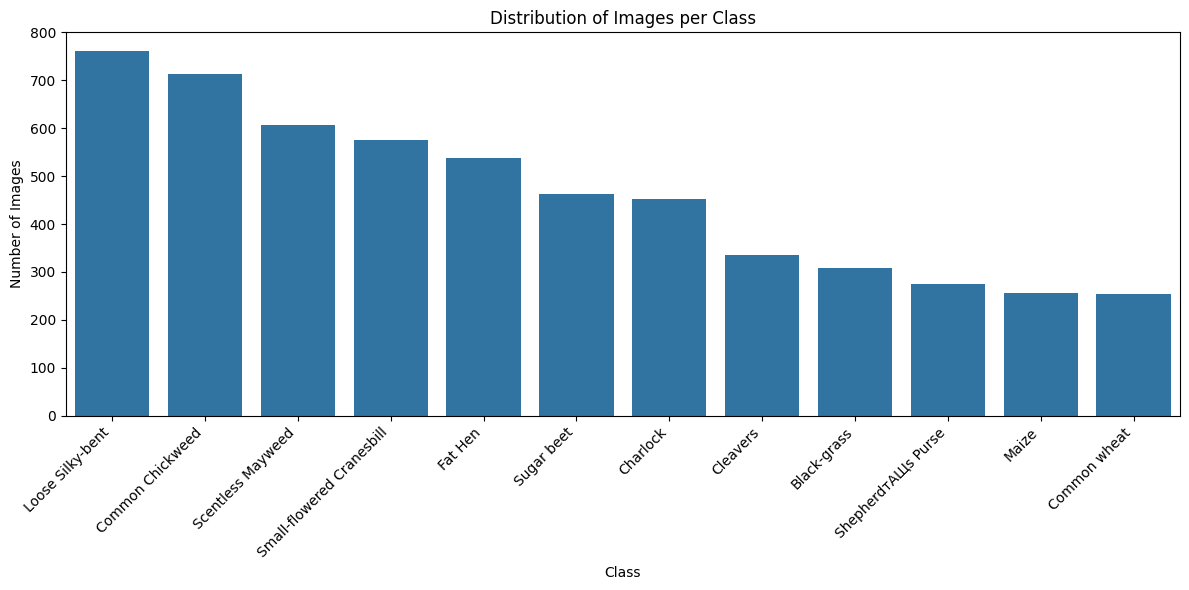


Sample Images:


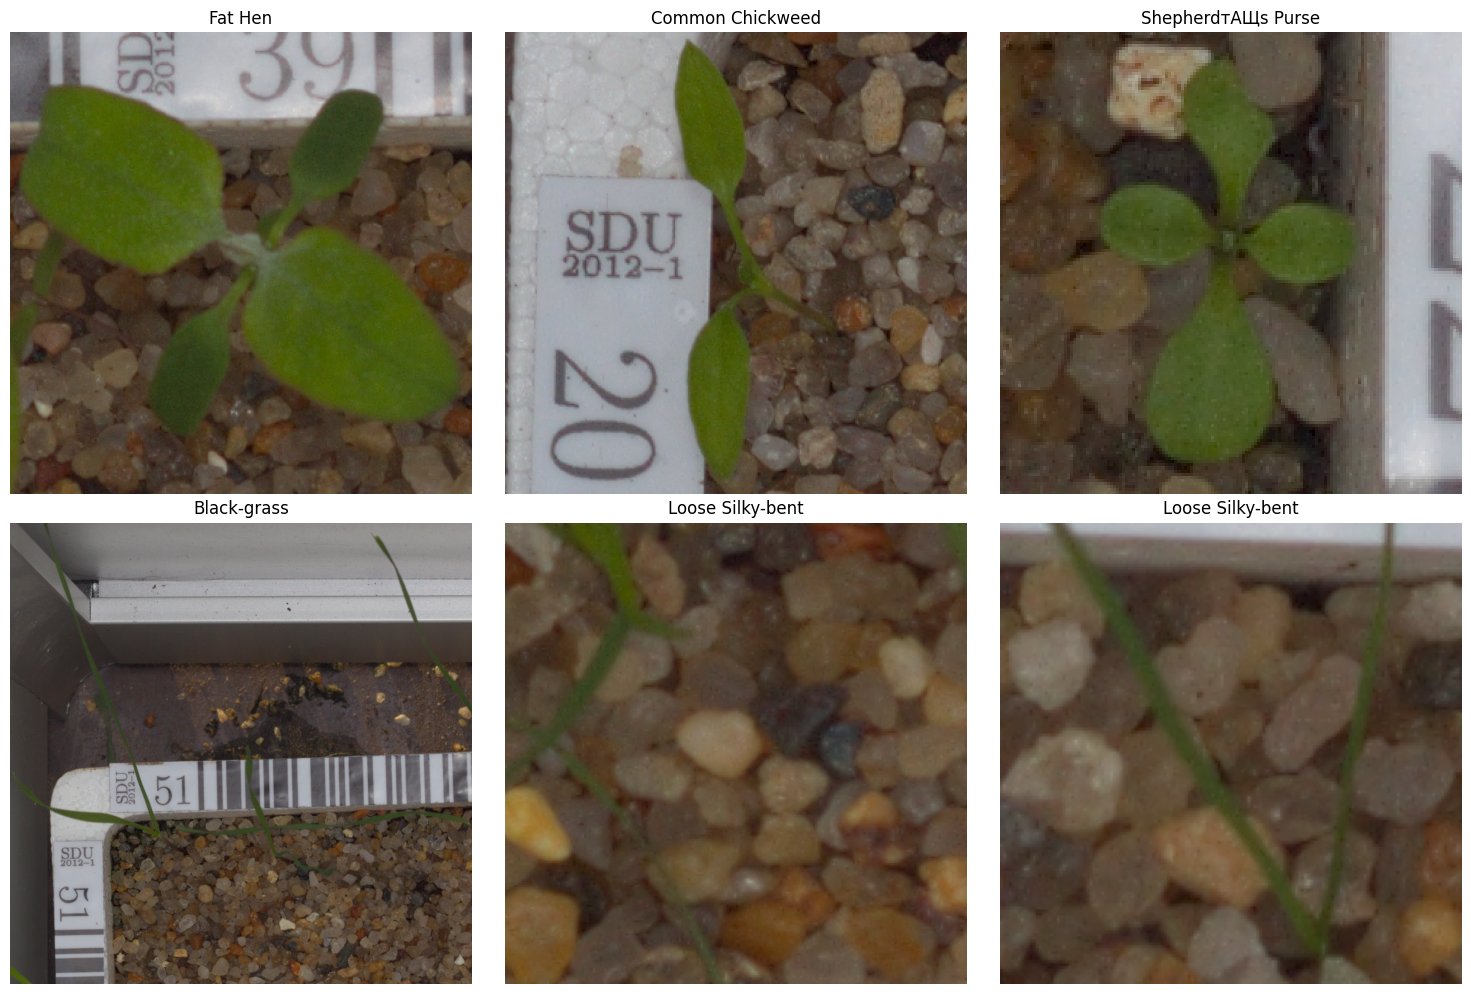

In [6]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Corrected DATA_DIR based on the directory listing
DATA_DIR = 'dataset'

# 1. List the directories within DATA_DIR
class_names = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
# Exclude 'nonsegmentedv2' as it's not a class directory for training
if 'nonsegmentedv2' in class_names:
    class_names.remove('nonsegmentedv2')
print("Class Names:", class_names)

# 2. Create a list of image file paths
image_paths = []
for class_name in class_names:
    class_dir = os.path.join(DATA_DIR, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        if os.path.isfile(image_path):
            image_paths.append({'path': image_path, 'class': class_name})

image_df = pd.DataFrame(image_paths)
print("\nFirst 5 image paths:")
display(image_df.head())

# 3. Count the number of images in each class
class_counts = image_df['class'].value_counts()
print("\nClass Distribution:")
display(class_counts)

# 4. Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

# 5. Display sample images
print("\nSample Images:")
plt.figure(figsize=(15, 10))
num_samples = min(6, len(image_df))
sample_images = image_df.sample(num_samples)
for i in range(num_samples):
    row = sample_images.iloc[i]
    try:
        img = Image.open(row['path'])
        plt.subplot(2, 3, i + 1) # Corrected subplot index
        plt.imshow(img)
        plt.title(row['class'])
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {row['path']}: {e}")
        continue

plt.tight_layout()
plt.show()

# Data cleaning and preprocessing




In [7]:
import numpy as np
from PIL import Image

# 3. Define the target dimensions for resizing
TARGET_DIM = (128, 128)

# 4. Initialize empty lists to store preprocessed images and labels
preprocessed_images = []
labels = []

# 5. Iterate through the image_df DataFrame
for index, row in image_df.iterrows():
    image_path = row['path']
    label = row['class']

    try:
        # Open the image file using PIL's Image.open()
        img = Image.open(image_path)

        # Convert the image to RGB to ensure consistent shape (height, width, 3)
        img_rgb = img.convert('RGB')

        # Resize the image to the TARGET_DIM
        img_resized = img_rgb.resize(TARGET_DIM)

        # Convert the resized image to a NumPy array
        img_array = np.array(img_resized)

        # Append the NumPy array to the list of preprocessed images
        preprocessed_images.append(img_array)

        # Append the corresponding class label to the list of labels
        labels.append(label)

    except Exception as e:
        print(f"Could not process image {image_path}: {e}")
        continue

# 7. Convert the list of preprocessed images and labels into NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# 8. Print the shape of the resulting preprocessed images array and labels array
print("Shape of preprocessed images array:", preprocessed_images.shape)
print("Shape of labels array:", labels.shape)

Shape of preprocessed images array: (5539, 128, 128, 3)
Shape of labels array: (5539,)


In [9]:
import numpy as np
from PIL import Image
import os

# 1. Define the target dimensions for resizing
TARGET_DIM = (128, 128) # Example dimensions, you can adjust this

# 2. Initialize empty lists to store preprocessed images and labels
preprocessed_images = []
labels = []

# Assuming image_df is already loaded from previous steps
# 3. Iterate through the image_df DataFrame
for index, row in image_df.iterrows():
    image_path = row['path']
    label = row['class']

    try:
        # Open the image file using PIL's Image.open()
        img = Image.open(image_path)

        # Convert the image to RGB to ensure consistent shape (height, width, 3)
        img_rgb = img.convert('RGB')

        # Resize the image to the TARGET_DIM
        img_resized = img_rgb.resize(TARGET_DIM)

        # Convert the resized image to a NumPy array
        img_array = np.array(img_resized)

        # Append the NumPy array to the list of preprocessed images
        preprocessed_images.append(img_array)

        # Append the corresponding class label to the list of labels
        labels.append(label)

    except Exception as e:
        print(f"Could not process image {image_path}: {e}")
        continue


# 5. Convert the list of preprocessed images and labels into NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# 6. Print the shape of the resulting preprocessed images array and labels array
print("Shape of preprocessed images array:", preprocessed_images.shape)
print("Shape of labels array:", labels.shape)

Shape of preprocessed images array: (5539, 128, 128, 3)
Shape of labels array: (5539,)


## Comparison before and after preprocessing



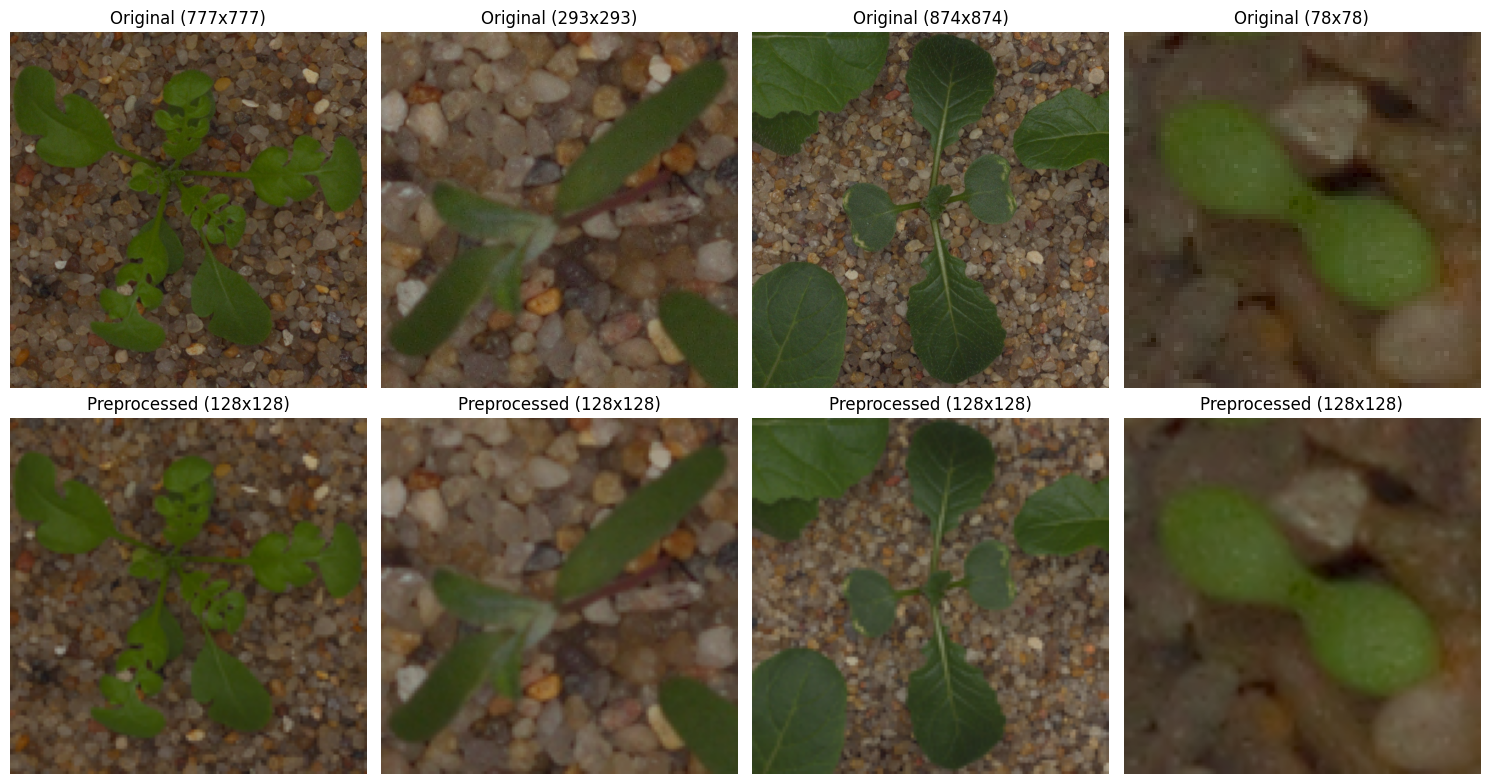


Comparing original and preprocessed image shapes:
Index 5194: Original Shape = (777, 777), Preprocessed Shape = (128, 128)
Index 890: Original Shape = (293, 293), Preprocessed Shape = (128, 128)
Index 3316: Original Shape = (874, 874), Preprocessed Shape = (128, 128)
Index 2315: Original Shape = (78, 78), Preprocessed Shape = (128, 128)

Shape of the entire preprocessed_images array: (5539, 128, 128, 3)
Target preprocessing dimensions: (128, 128)


In [10]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Select a few sample indices
num_samples_to_compare = 4
sample_indices = random.sample(range(len(image_df)), num_samples_to_compare)

plt.figure(figsize=(15, 8))

# 2. and 3. Load and display original and preprocessed images
for i, index in enumerate(sample_indices):
    # Display Original Image
    original_path = image_df.loc[index, 'path']
    try:
        original_img = Image.open(original_path)
        plt.subplot(2, num_samples_to_compare, i + 1)
        plt.imshow(original_img)
        plt.title(f"Original ({original_img.size[1]}x{original_img.size[0]})")
        plt.axis('off')

        # Display Preprocessed Image
        # preprocessed_images is a numpy array, already loaded
        preprocessed_img_array = preprocessed_images[index]
        plt.subplot(2, num_samples_to_compare, i + num_samples_to_compare + 1)
        plt.imshow(preprocessed_img_array)
        plt.title(f"Preprocessed ({preprocessed_img_array.shape[0]}x{preprocessed_img_array.shape[1]})")
        plt.axis('off')

    except Exception as e:
        print(f"Could not process image at index {index}: {e}")
        continue

plt.tight_layout()
plt.show()

# 4. Comment on visual differences (will be done after the plot is generated)

# 5. Print original and preprocessed shapes
print("\nComparing original and preprocessed image shapes:")
for index in sample_indices:
    original_path = image_df.loc[index, 'path']
    try:
        original_img = Image.open(original_path)
        print(f"Index {index}: Original Shape = {original_img.size}, Preprocessed Shape = {preprocessed_images[index].shape[:2]}")
    except Exception as e:
        print(f"Could not get shape for image at index {index}: {e}")
        continue

print(f"\nShape of the entire preprocessed_images array: {preprocessed_images.shape}")
print(f"Target preprocessing dimensions: {TARGET_DIM}")


# Model Choice and Training

### For image classification tasks like the Plant Seedlings Dataset, Convolutional Neural Networks (CNNs) are a highly effective choice. CNNs are specifically designed to process data with a grid-like topology, such as images.

## Key components of a typical CNN include:

**Convolutional Layers:** These layers apply learnable filters to the input image to detect features such as edges, corners, and textures. Each filter slides over the input, performing a convolution operation, and produces a feature map.

**Activation Functions:** Non-linear activation functions (like ReLU - Rectified Linear Unit) are applied after convolutional layers to introduce non-linearity into the model, allowing it to learn more complex patterns.

**Pooling Layers:** These layers reduce the spatial dimensions (width and height) of the feature maps, reducing the number of parameters and computation. This helps to control overfitting and makes the network more robust to variations in the position of features in the image. Max pooling and average pooling are common types.

**Flatten Layer:** This layer takes the multi-dimensional output from the convolutional and pooling layers and flattens it into a single, long vector. This vector serves as the input to the subsequent dense layers.

**Dense (Fully Connected) Layers:** These are standard neural network layers where each neuron is connected to every neuron in the previous layer. They take the flattened feature vector and perform classification based on the learned features.

**Output Layer:** The final dense layer has a number of units equal to the number of classes in the dataset. For multi-class classification, a 'softmax' activation function is typically used to output a probability distribution over the classes.

By stacking these layers, CNNs can automatically learn hierarchical representations of images, starting from simple features in early layers and combining them into more complex features in deeper layers, making them well-suited for image classification tasks.

In [ ]:


# Import necessary libraries from TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 3. Split the preprocessed image data and labels into training and testing sets
# Use preprocessed_images and labels from the previous step
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 4. Convert the labels into a categorical format (one-hot encoding)
# First, encode the string labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Then, perform one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Get the number of classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# 5. Build a sequential CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_DIM[0], TARGET_DIM[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])

# 6. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Print model summary
model.summary()

# 7. Train the compiled model
# Store the training history
history = model.fit(
    X_train, y_train_categorical,
    epochs=10, # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_data=(X_test, y_test_categorical)
)

# 8. Training history is stored in the 'history' variable

Number of classes: 12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,188 (12.61 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.1854 - loss: 2.3266 - val_accuracy: 0.3908 - val_loss: 1.7391
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.4821 - loss: 1.4696 - val_accuracy: 0.5650 - val_loss: 1.2595
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.5963 - loss: 1.1532 - val_accuracy: 0.6264 - val_loss: 1.0970
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6833 - loss: 0.9114 - val_accuracy: 0.6561 - val_loss: 0.9984
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7244 - loss: 0.8279 - val_accuracy: 0.6877 - val_loss: 0.9670
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7895 - loss: 0.6186 - val_accuracy: 0.7139 - val_loss: 0.8330
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.8325 - loss: 0.5062 - val_accuracy: 0.7265 - val_loss: 0.8590
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.8618 - loss: 0.4075 - val_accu

**Reasoning**:
I was unable to create a markdown cell in the previous step. I will proceed with the code cell to split the data, convert labels, build, compile, and train the CNN model as outlined in steps 2-8 of the subtask instructions.



**Reasoning**:
The previous attempt failed because the `preprocessed_images` and `labels` variables were not defined in the current execution environment. This is likely due to a notebook state issue where the cell defining these variables was not executed. I need to re-execute the code that generates `preprocessed_images` and `labels` before proceeding with the model training steps. I will combine the preprocessing code and the model training code into a single cell to ensure the variables are available. I still need to create the markdown cell explaining the model choice.



## Performance Metrics

Test Loss: 1.0077
Test Accuracy: 0.7220
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step


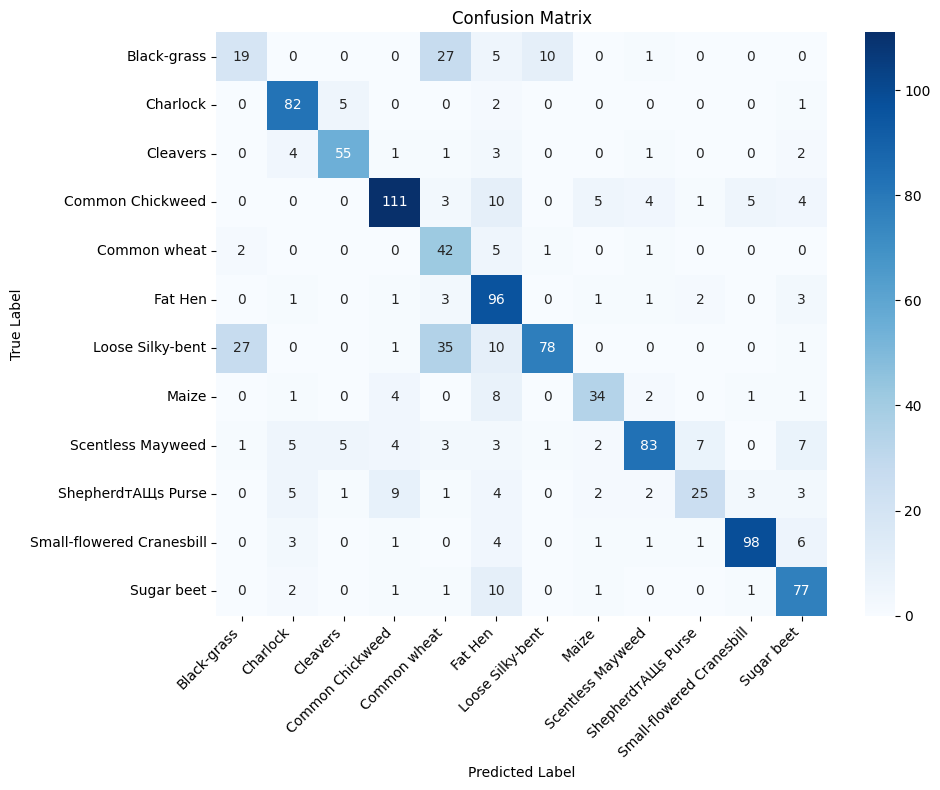


Classification Report:
                           precision    recall  f1-score   support

              Black-grass       0.39      0.31      0.34        62
                 Charlock       0.80      0.91      0.85        90
                 Cleavers       0.83      0.82      0.83        67
         Common Chickweed       0.83      0.78      0.80       143
             Common wheat       0.36      0.82      0.50        51
                  Fat Hen       0.60      0.89      0.72       108
         Loose Silky-bent       0.87      0.51      0.64       152
                    Maize       0.74      0.67      0.70        51
        Scentless Mayweed       0.86      0.69      0.76       121
       ShepherdтАЩs Purse       0.69      0.45      0.55        55
Small-flowered Cranesbill       0.91      0.85      0.88       115
               Sugar beet       0.73      0.83      0.78        93

                 accuracy                           0.72      1108
                macro avg       0.72

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)
y_test_encoded_flat = np.argmax(y_test_categorical, axis=1) # Flatten one-hot encoded true labels

# Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_encoded_flat, y_pred_encoded)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test_encoded_flat, y_pred_encoded, target_names=label_encoder.classes_))

Displaying sample augmented images with individual augmentation effects:


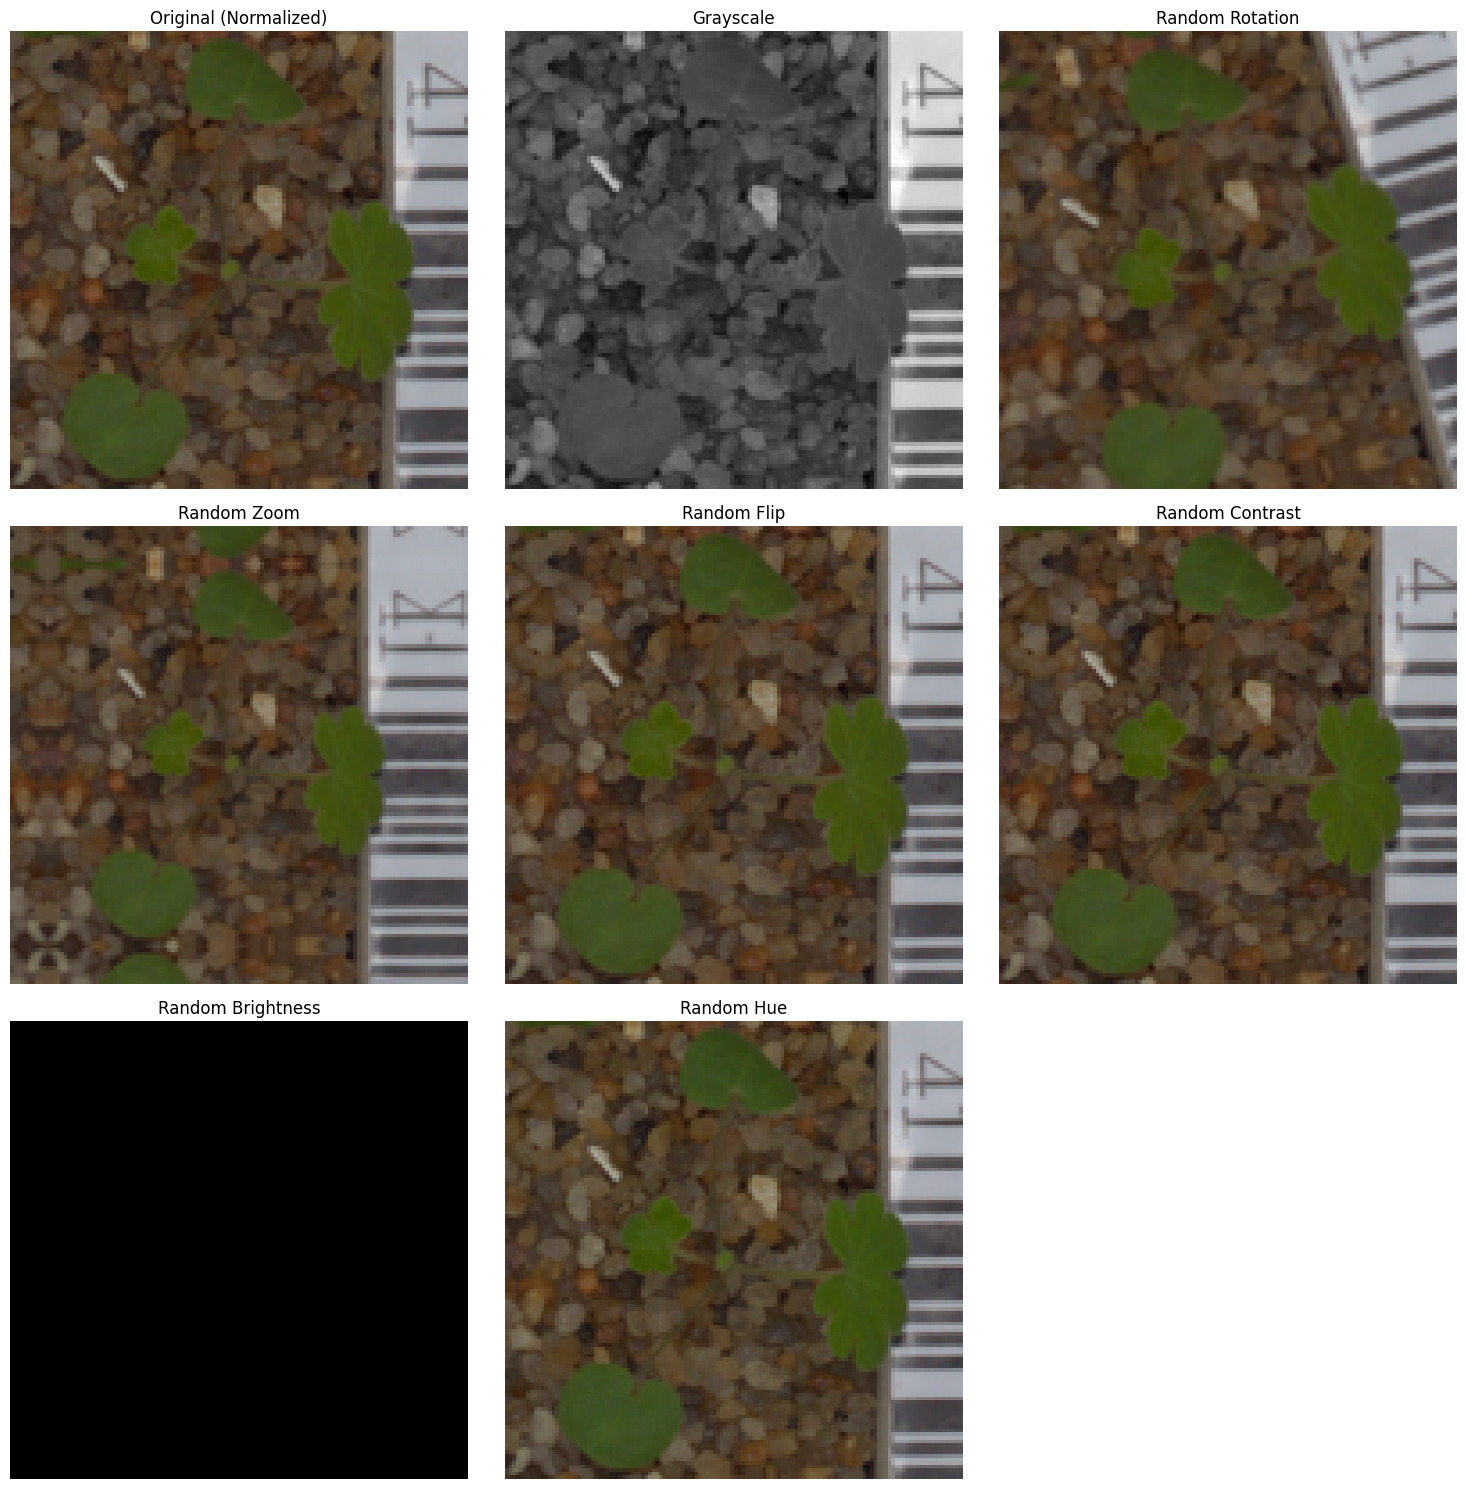

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

image_dataset = tf.data.Dataset.from_tensor_slices(preprocessed_images)
label_dataset = tf.data.Dataset.from_tensor_slices(labels)
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))


# These layers are designed to be used within a tf.data pipeline or a Keras model
random_rotation_layer = tf.keras.layers.RandomRotation(factor=(-0.1, 0.1))
random_zoom_layer = tf.keras.layers.RandomZoom(height_factor=(0.2, 0.2), width_factor=(0.2, 0.2))
random_flip_layer = tf.keras.layers.RandomFlip("horizontal_and_vertical")
random_contrast_layer = tf.keras.layers.RandomContrast(factor=0.2)
random_brightness_layer = tf.keras.layers.RandomBrightness(factor=0.2)
random_hue_layer = tf.keras.layers.RandomHue(factor=0.1)



def preprocess_and_augment(image, label):

    image = tf.cast(image, tf.float32) / 255.0


    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    image = random_rotation_layer(image)
    image = random_zoom_layer(image)
    image = random_flip_layer(image)
    image = random_contrast_layer(image)
    image = random_brightness_layer(image)
    image = random_hue_layer(image)



    image = tf.clip_by_value(image, 0.0, 1.0)

    return image, label
augmented_dataset = dataset.map(preprocess_and_augment)

print("Displaying sample augmented images with individual augmentation effects:")

sample_image, sample_label = next(iter(dataset.take(1)))
sample_image = tf.cast(sample_image, tf.float32) / 255.0 # Normalize the sample image

augmentations_to_display = {
    "Original (Normalized)": sample_image,
    "Grayscale": tf.image.rgb_to_grayscale(sample_image),
    "Random Rotation": random_rotation_layer(sample_image),
    "Random Zoom": random_zoom_layer(sample_image),
    "Random Flip": random_flip_layer(sample_image),
    "Random Contrast": random_contrast_layer(sample_image),
    "Random Brightness": random_brightness_layer(sample_image),
    "Random Hue": random_hue_layer(sample_image),
}

num_augmentations = len(augmentations_to_display)
plt.figure(figsize=(15, 5 * ((num_augmentations + 2) // 3)))

for i, (title, augmented_img) in enumerate(augmentations_to_display.items()):
    plt.subplot((num_augmentations + 2) // 3, 3, i + 1)
    if augmented_img.shape[-1] == 1:
        plt.imshow(augmented_img.numpy().squeeze(), cmap='gray')
    else:
        plt.imshow(tf.clip_by_value(augmented_img, 0.0, 1.0).numpy())
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

